<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Lesson_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My GitHub link: https://github.com/Shufen-Yin/Artificial-Intelligence/blob/main/Lesson_12.ipynb

In [21]:
# Task 1  Load the Dataset (using TensorFlow/Keras)
# 1 Below is code for Fashion MNIST.
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Step 3: Normalize pixel values (0–1 range)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 4: Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


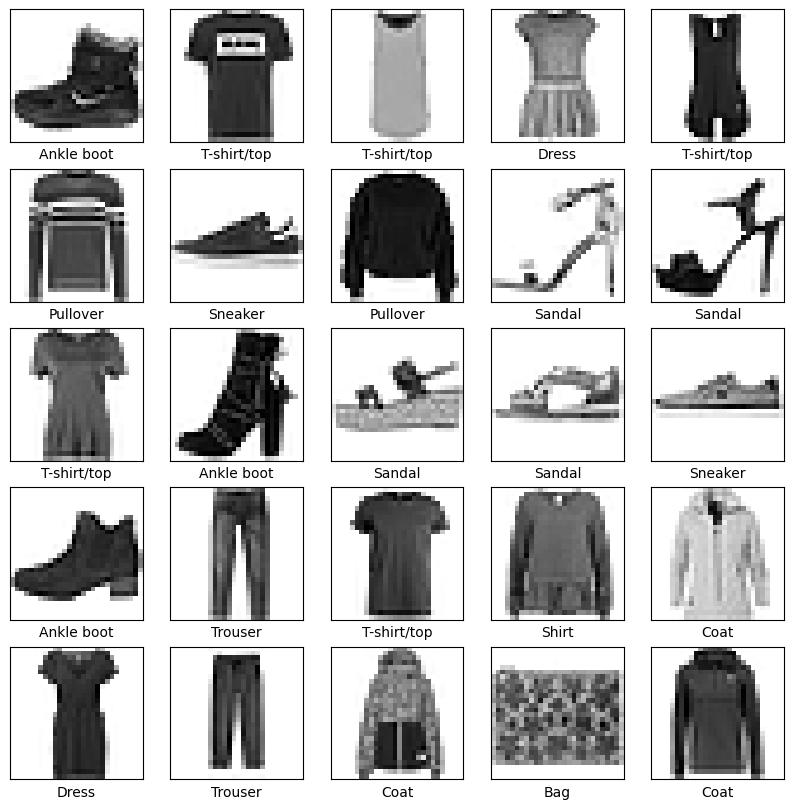

In [3]:
# 2 Visualize Some Images

In [4]:
#Task 2: Image Preprocessing
#1. Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0
print("Pixel range after normalization:", train_images.min(), "to", train_images.max())


Pixel range after normalization: 0.0 to 0.00392156862745098


In [5]:
#2. Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,        # rotate images up to 10 degrees
    width_shift_range=0.1,    # shift horizontally up to 10%
    height_shift_range=0.1,   # shift vertically up to 10%
    shear_range=0.1,          # shear angle
    zoom_range=0.1,           # zoom in/out
    horizontal_flip=True,     # flip images horizontally
)

# Fit the generator to the training data
datagen.fit(train_images.reshape(-1, 28, 28, 1))  # add channel dimension (for grayscale)


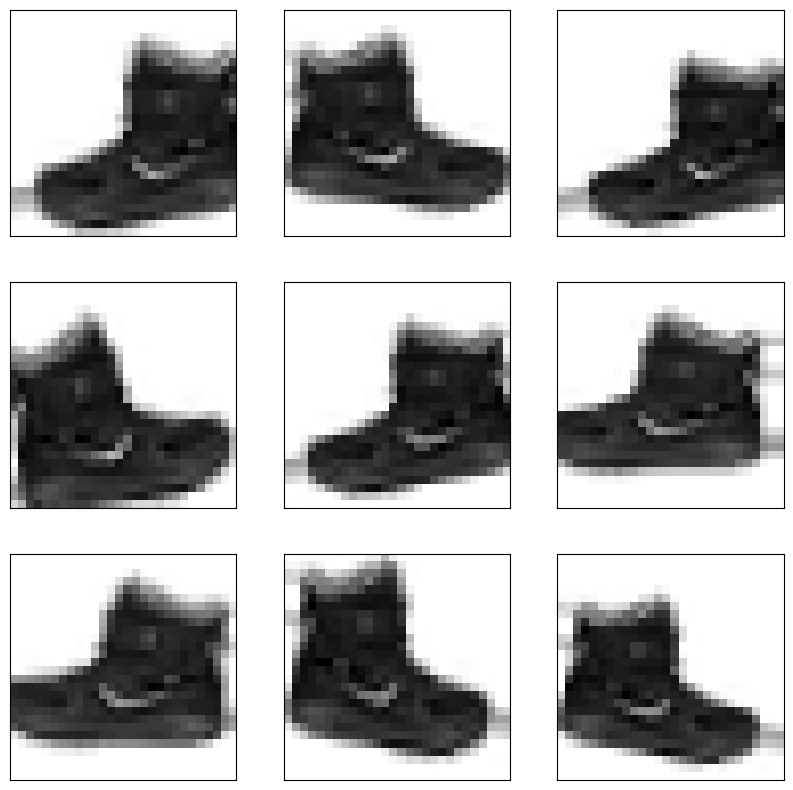

In [6]:
# visualize augmented examples
import matplotlib.pyplot as plt

# pick one image to visualize multiple augmentations
sample_img = train_images[0].reshape((1, 28, 28, 1))
plt.figure(figsize=(10, 10))

for i, batch in enumerate(datagen.flow(sample_img, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(batch[0].reshape(28, 28), cmap=plt.cm.binary)
    if i == 8:  # show 9 augmented samples
        break
plt.show()


In [7]:
# Task 3: Neural Network Implementation
# 1. Model Architecture
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Input layer
    layers.Dense(128, activation='relu'),     # Hidden layer
    layers.Dense(64, activation='relu'),      # Optional second hidden layer
    layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

# Show model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 2. Model Compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
#3. Model Training
history = model.fit(
    train_images,
    train_labels,
    epochs=15,              # You can adjust to 10–20
    batch_size=64,          # 32 or 64 both fine
    validation_split=0.2,   # 20% of training data for validation
    verbose=2
)


Epoch 1/15
750/750 - 6s - 8ms/step - accuracy: 0.5935 - loss: 1.1356 - val_accuracy: 0.7382 - val_loss: 0.7182
Epoch 2/15
750/750 - 3s - 4ms/step - accuracy: 0.7571 - loss: 0.6558 - val_accuracy: 0.7774 - val_loss: 0.6026
Epoch 3/15
750/750 - 3s - 4ms/step - accuracy: 0.7873 - loss: 0.5806 - val_accuracy: 0.7968 - val_loss: 0.5605
Epoch 4/15
750/750 - 4s - 6ms/step - accuracy: 0.8058 - loss: 0.5408 - val_accuracy: 0.8084 - val_loss: 0.5305
Epoch 5/15
750/750 - 4s - 5ms/step - accuracy: 0.8158 - loss: 0.5111 - val_accuracy: 0.8207 - val_loss: 0.5039
Epoch 6/15
750/750 - 3s - 4ms/step - accuracy: 0.8260 - loss: 0.4871 - val_accuracy: 0.8177 - val_loss: 0.4984
Epoch 7/15
750/750 - 5s - 6ms/step - accuracy: 0.8333 - loss: 0.4675 - val_accuracy: 0.8289 - val_loss: 0.4710
Epoch 8/15
750/750 - 3s - 4ms/step - accuracy: 0.8399 - loss: 0.4521 - val_accuracy: 0.8368 - val_loss: 0.4544
Epoch 9/15
750/750 - 3s - 4ms/step - accuracy: 0.8429 - loss: 0.4414 - val_accuracy: 0.8422 - val_loss: 0.4486
E

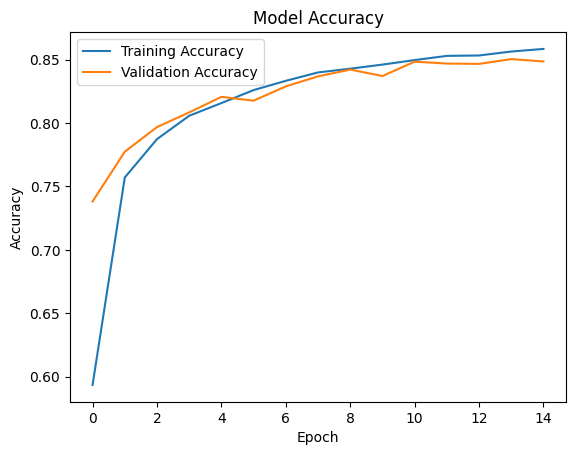

In [10]:
# 4.Plot Training Results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
#Task 4: Model Evaluation
# 1. Evaluate the Model on the Test Set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.8382 - loss: 0.4490
Test Accuracy: 0.8382


In [12]:
# 2. Make Predictions
import numpy as np

y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)  # convert probabilities to class indices


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


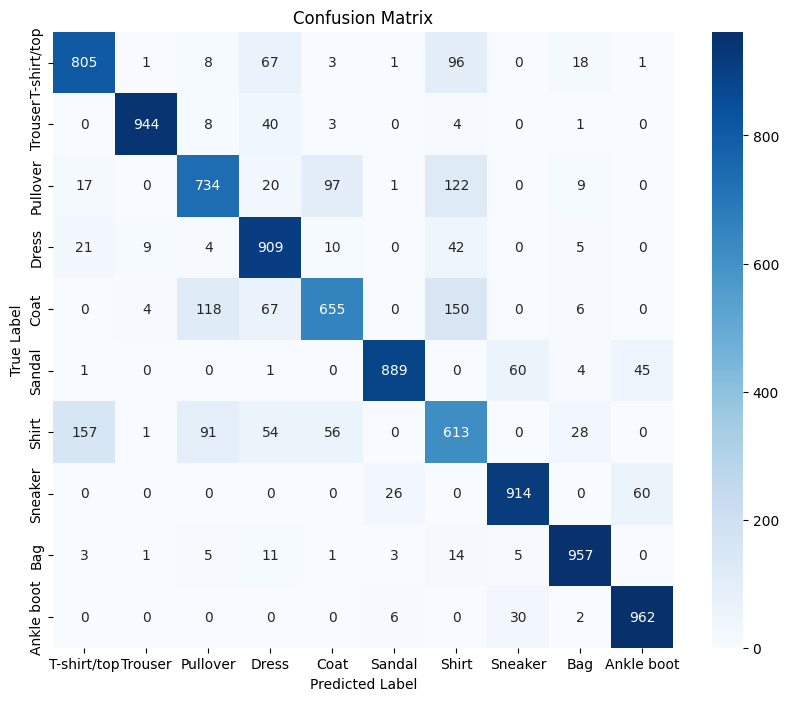

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.98      0.94      0.96      1000
    Pullover       0.76      0.73      0.75      1000
       Dress       0.78      0.91      0.84      1000
        Coat       0.79      0.66      0.72      1000
      Sandal       0.96      0.89      0.92      1000
       Shirt       0.59      0.61      0.60      1000
     Sneaker       0.91      0.91      0.91      1000
         Bag       0.93      0.96      0.94      1000
  Ankle boot       0.90      0.96      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [13]:
# 3. Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=class_names))


In [14]:
#4. Model Improvements (Experimentation Ideas)
# Option A: Add More Layers or Units
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#Option B: Change Optimizer Try RMSprop or SGD:
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
# Option C: Add Dropout to Reduce Overfitting
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),       # randomly drop 30% neurons each epoch
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [17]:
# Option D: Evaluate the Impact of Data Augmentation, used the ImageDataGenerator earlier:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),       # randomly drop 30% neurons each epoch
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Task 5: Application Demonstration
🔹 Practical Deployment Scenario

Example Application: Fashion Retail Industry (Smart Product Recognition System)

Your trained Fashion MNIST model can be applied in a digital fashion retail system to automatically recognize and categorize clothing items from images — e.g., when customers upload photos to search for similar items or when products are listed online by sellers.

🛍️ Example Use Cases:

Automated Product Tagging:
When a seller uploads a photo, the system uses your trained model to identify if it’s a T-shirt, dress, sandal, etc., and automatically assigns the correct product category.
→ Reduces manual tagging effort and speeds up cataloging.

Visual Search & Recommendation:
Customers can upload a picture of an outfit they like; the system identifies clothing types and recommends similar styles available in the store.
→ Improves customer engagement and personalization.

Inventory Management:
Warehouses can use cameras to classify clothing types on shelves for stock tracking.
→ Enhances automation and reduces human error.

🔹 Operational and Technical Considerations

| Challenge                             | Description                                                            | Possible Solution                                                                                                  |
| ------------------------------------- | ---------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **Model Scalability**                 | Retail platforms may handle thousands of image uploads simultaneously. | Use cloud-based model serving (e.g., TensorFlow Serving, AWS SageMaker, or Google Vertex AI) to scale dynamically. |
| **Real-Time Processing**              | For interactive search, predictions must happen in milliseconds.       | Convert the model to TensorFlow Lite or ONNX for edge deployment; use GPU or TPU acceleration for inference.       |
| **Integration with Existing Systems** | Retail systems already manage data via APIs and databases.             | Deploy the model as a RESTful API endpoint that other systems can query.                                           |
| **Model Drift / Updates**             | Fashion trends and new categories evolve over time.                    | Periodically retrain the model on new labeled data to maintain accuracy.                                           |
| **Data Privacy**                      | Customer-uploaded photos may contain personal information.             | Apply anonymization (face blurring), secure uploads, and follow data protection regulations.                       |


Example Architecture (Conceptual)

[Customer Upload] → [Image Preprocessing] → [Deployed Model (TensorFlow Serving)]
                        ↓
             [Category Prediction (e.g., “Sneaker”)]
                        ↓
            [Database + Recommendation Engine]
                        ↓
           [Front-End Display / API Integration]


Broader Reflection: Comparing with Traditional ML

Traditional machine learning models (e.g., logistic regression, SVM) would struggle with Fashion MNIST due to:

Raw pixel inputs being high-dimensional (784 features per image),

Lack of spatial pattern recognition,

Need for manual feature extraction.

By contrast, your neural network automatically learns hierarchical image features, leading to much higher accuracy and adaptability.

Example Summary Paragraph for Your Report

In a practical setting, the trained neural network model could be deployed in a digital fashion retail system to automate product categorization, visual search, and inventory management. By leveraging cloud-based APIs, GPU acceleration, and model optimization techniques such as TensorFlow Lite, the system can achieve real-time image classification at scale. Periodic retraining with new fashion data would ensure relevance as trends evolve. Compared to traditional machine learning methods, the neural network demonstrates superior performance in recognizing complex visual patterns without manual feature engineering, illustrating the practical advantages of deep learning in modern retail applications.